-CRIM: Per capita crime rate by town. It indicates the level of crime in the area.

-ZN: Proportion of residential land zoned for lots over 25,000 sq.ft. This feature reflects the area's residential density.

-INDUS: Proportion of non-retail business acres per town. This is an indicator of the commercial use of land away from residential areas.

-CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise). This indicates whether the property is near the Charles River, which may add to the aesthetic value of the neighborhood.

-NOX: Nitric oxides concentration (parts per 10 million). It represents the level of industrial pollutants in the area.

-RM: Average number of rooms per dwelling. More rooms typically indicate more spacious accommodation.

-AGE: Proportion of owner-occupied units built prior to 1940. Older structures might lack newer amenities or could be considered more prestigious depending on the architecture and condition.

-DIS: Weighted distances to five Boston employment centres. This feature measures the accessibility to workplaces, which can influence housing prices.

-RAD: Index of accessibility to radial highways. Higher values indicate easier access to major roadways.

-TAX: Full-value property-tax rate per $10,000. This reflects the annual property tax rate.

-PTRATIO: Pupil-teacher ratio by town. Lower values typically indicate better educational facilities, which is a significant factor for families when choosing a home.

-B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town.

-LSTAT: Percentage of lower status of the population.

-MEDV: Median value of owner-occupied homes in $1000s

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
boston_data = pd.read_csv('HousingData.csv')

Matplotlib is building the font cache; this may take a moment.


In [2]:
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [ ]:
boston_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Handling missing data

In [4]:
boston_data.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

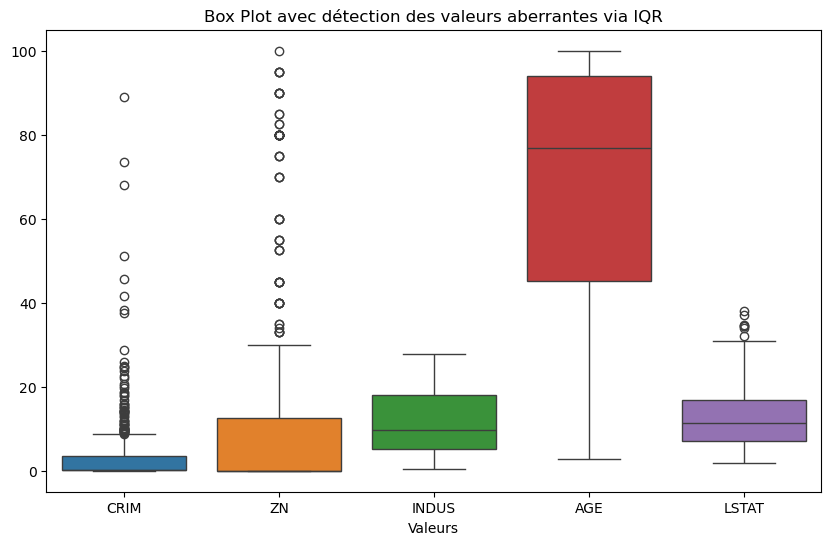

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
columns_with_na = ['CRIM', 'ZN', 'INDUS', 'AGE', 'LSTAT']
sns.boxplot(data=boston_data[columns_with_na])
plt.title("Box Plot avec détection des valeurs aberrantes via IQR")
plt.xlabel("Valeurs")
plt.show()

In [6]:
# Loop over columns with missing values and calculate skewness

for col in columns_with_na:
    skewness = boston_data[col].skew()
    print(f"Skewness of {col}: {skewness}")


Skewness of CRIM: 5.2128426499800975
Skewness of ZN: 2.2566126051408197
Skewness of INDUS: 0.30372218758107833
Skewness of AGE: -0.5824700575056604
Skewness of LSTAT: 0.908891836957813


In [7]:
from sklearn.impute import SimpleImputer

# Impute CRIM, ZN, and LSTAT using median (or you could try KNN imputation)
median_imputer = SimpleImputer(strategy='median')
boston_data[['CRIM', 'ZN', 'LSTAT']] = median_imputer.fit_transform(boston_data[['CRIM', 'ZN', 'LSTAT']])

# Impute INDUS and AGE using mean
mean_imputer = SimpleImputer(strategy='mean')
boston_data[['INDUS', 'AGE']] = mean_imputer.fit_transform(boston_data[['INDUS', 'AGE']])


In [8]:
from sklearn.impute import SimpleImputer

# Mode Imputation for the categorical column
mode_imputer = SimpleImputer(strategy='most_frequent')
boston_data[['CHAS']] = mode_imputer.fit_transform(boston_data[['CHAS']])

boston_data.isna().sum()


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## Handling outliers

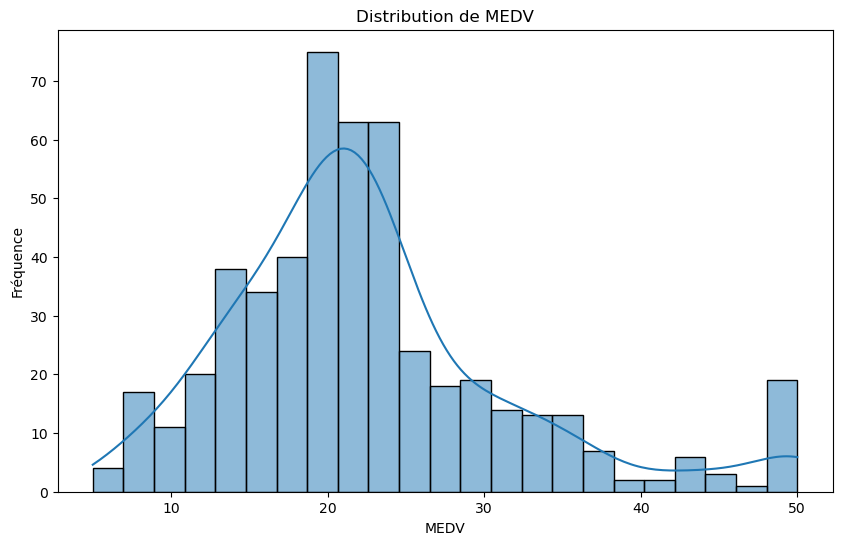

Skewness de MEDV : 1.1080984082549072
Test de Shapiro-Wilk : Statistique = 0.9171758803890093, p-value = 4.941386258635722e-16


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

# 1. Visualiser la distribution de MEDV
plt.figure(figsize=(10, 6))
sns.histplot(boston_data['MEDV'], kde=True)
plt.title("Distribution de MEDV")
plt.xlabel("MEDV")
plt.ylabel("Fréquence")
plt.show()

# 2. Vérifier la skewness de MEDV
skewness = boston_data['MEDV'].skew()
print(f"Skewness de MEDV : {skewness}")

# 3. Tester la normalité avec le test de Shapiro-Wilk (si nécessaire)
stat, p_value = stats.shapiro(boston_data['MEDV'].dropna())
print(f"Test de Shapiro-Wilk : Statistique = {stat}, p-value = {p_value}")



The box cox transformation is a parametrized transformation that tries to get distributions "as close to a normal distribution as possible".

It is defined as:

$$ \text{boxcox}(y_i) = \frac{y_i^{\lambda} - 1}{\lambda} $$

You can think of as a generalization of the square root function: the square root function uses the exponent of 0.5, but box cox lets its exponent vary so it can find the best one

Paramètre lambda de Box-Cox : 0.21662091178859486


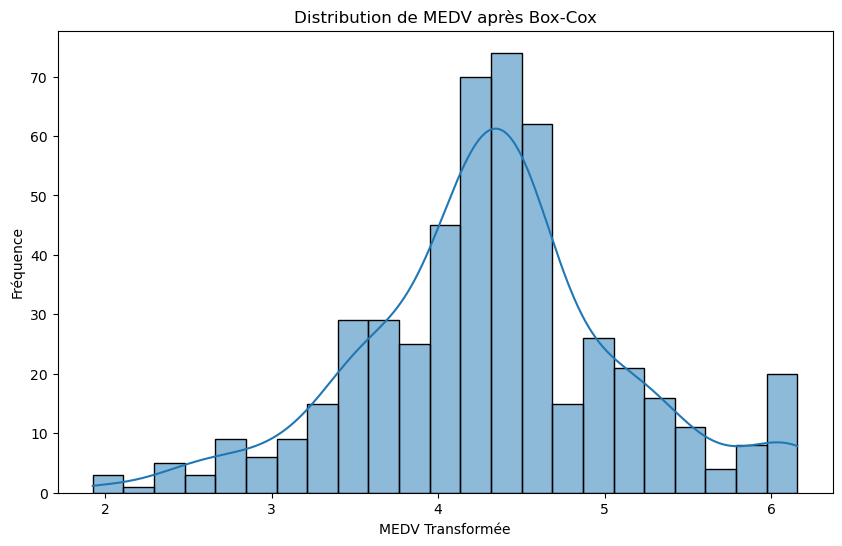

In [10]:
# 4. Appliquer Box-Cox si nécessaire (seulement si la skewness est élevée)
if abs(skewness) > 0.5:  # Critère de skewness élevé, ajustez au besoin
    # Box-Cox nécessite que les données soient strictement positives
    if (boston_data['MEDV'] <= 0).any():
        print("Box-Cox ne peut pas être appliqué car la variable contient des valeurs négatives ou nulles.")
    else:
        # Appliquer Box-Cox
        transformed_data, lambda_param = stats.boxcox(boston_data['MEDV'])
        print(f"Paramètre lambda de Box-Cox : {lambda_param}")
        
        # Afficher la distribution après transformation
        plt.figure(figsize=(10, 6))
        sns.histplot(transformed_data, kde=True)
        plt.title("Distribution de MEDV après Box-Cox")
        plt.xlabel("MEDV Transformée")
        plt.ylabel("Fréquence")
        plt.show()
        
        # Remplacer MEDV par la version transformée dans les données
        boston_data['MEDV'] = transformed_data

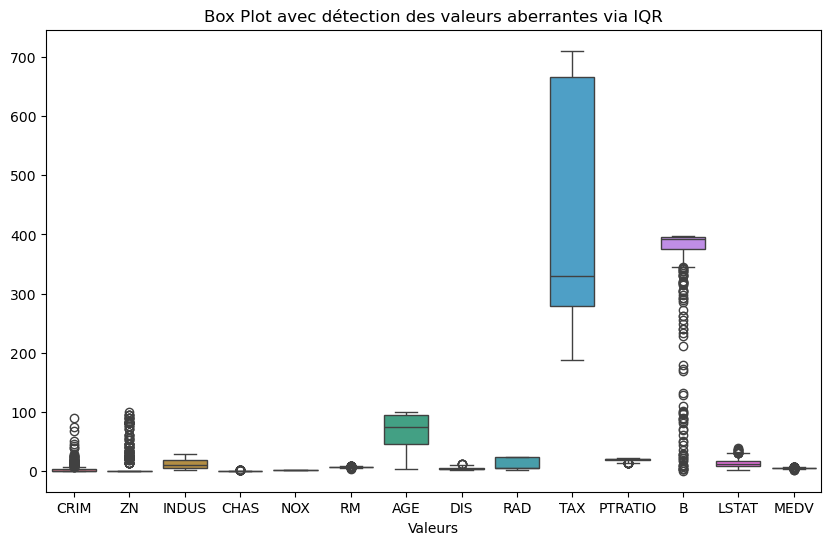

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(data=boston_data)
plt.title("Box Plot avec détection des valeurs aberrantes via IQR")
plt.xlabel("Valeurs")
plt.show()

In [12]:
# Loop over each column in the dataset to handle outliers
for col in boston_data.columns:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile) for the column
    Q1 = boston_data[col].quantile(0.25)
    Q3 = boston_data[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with the bounds
    boston_data[col] = boston_data[col].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

# Verify the changes by checking summary statistics
boston_data.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.0,506.000000,506.0,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,1.810211,0.0,11.083992,0.0,0.554695,6.275312,68.518519,3.783947,9.549407,408.237154,18.463834,381.918836,12.603340,4.322075
std,2.623892,0.0,6.699165,0.0,0.115878,0.630242,27.439466,2.069765,8.707259,168.537116,2.143924,19.054913,6.835809,0.718332
min,0.006320,0.0,0.460000,0.0,0.385000,4.778500,2.900000,1.129600,1.000000,187.000000,13.200000,344.106250,1.730000,2.803718
25%,0.083235,0.0,5.190000,0.0,0.449000,5.885500,45.925000,2.100175,4.000000,279.000000,17.400000,375.377500,7.230000,3.914221
50%,0.253715,0.0,9.900000,0.0,0.538000,6.208500,74.450000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,4.329286
75%,2.808720,0.0,18.100000,0.0,0.624000,6.623500,93.575000,5.188425,24.000000,666.000000,20.200000,396.225000,16.570000,4.654557
max,6.896948,0.0,27.740000,0.0,0.871000,7.730500,100.000000,9.820800,24.000000,711.000000,22.000000,396.900000,30.580000,5.765060


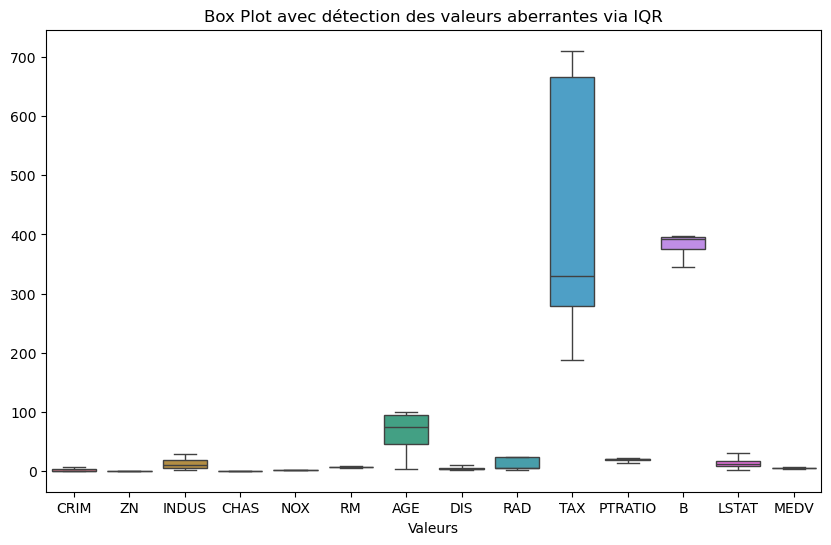

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(data=boston_data)
plt.title("Box Plot avec détection des valeurs aberrantes via IQR")
plt.xlabel("Valeurs")
plt.show()

## feature selection

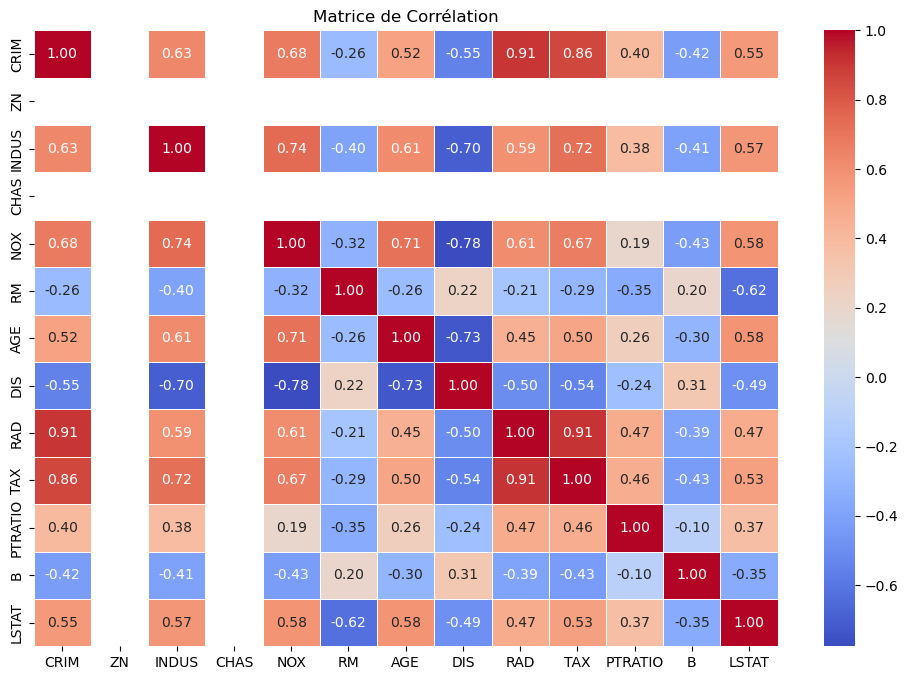

In [14]:
# Calculer la matrice de corrélation
correlation_matrix = boston_data.drop('MEDV', axis=1).corr()

# Afficher la matrice de corrélation sous forme de heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice de Corrélation')
plt.show()

In [15]:
# Corrélation avec la cible 'MEDV'
correlation_with_target = correlation_matrix['MEDV'].sort_values(ascending=False)
print(correlation_with_target)


KeyError: 'MEDV'

In [ ]:

# Identifier les variables significatives (par exemple, avec un seuil de 0.7)
threshold = 0.8
significant_correlations = correlation_matrix[(correlation_matrix >= threshold) | (correlation_matrix <= -threshold)]

significant_correlations_cleaned = significant_correlations.dropna(how='all').dropna(axis=1, how='all')


# Visualisation avec un heatmap pour les corrélations significatives
plt.figure(figsize=(12, 12))
sns.heatmap(significant_correlations_cleaned, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Matrice de Corrélation des Variables Significatives")
plt.show()

In [ ]:
import pandas as pd

# Calculer la matrice de corrélation
correlation_matrix = boston_data.corr()

# Définir un seuil de corrélation élevé (par exemple, 0.8)
high_corr_threshold = 0.8

# Initialiser une liste pour stocker les colonnes à supprimer
to_drop = set()

# Parcourir chaque paire de variables
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > high_corr_threshold:
            col1 = correlation_matrix.columns[i]
            col2 = correlation_matrix.columns[j]
            
            # Vérifier la corrélation de chaque variable avec MEDV
            if abs(correlation_matrix['MEDV'][col1]) >= abs(correlation_matrix['MEDV'][col2]):
                to_drop.add(col2)
            else:
                to_drop.add(col1)

# Supprimer les variables identifiées
new_boston_data = boston_data.drop(columns=to_drop)

# Afficher les variables supprimées
print("Variables supprimées en raison de la colinéarité :", to_drop)


In [ ]:
new_boston_data.head()

## Standardization des variables

In [ ]:
from sklearn.model_selection import train_test_split

# Séparer les variables explicatives et la cible
X = new_boston_data.drop(columns=['MEDV'])
y = new_boston_data['MEDV']

# Diviser le jeu de données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialiser le standard scaler
scaler = StandardScaler()

# Standardiser les données d'entraînement et de test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Entrainement du modèle

### Trouver les meilleurs hyperparametres pour Ridge, Lasso et ElasticNet

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

# Définir la grille d'hyperparamètres pour alpha
param_grid = {'alpha': [0.01, 0.1, 1.0, 1.5, 2, 10.0, 100.0]}

# Rechercher le meilleur alpha pour Ridge
ridge_cv = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train_scaled, y_train)
best_alpha_ridge = ridge_cv.best_params_['alpha']
print("Meilleur alpha pour Ridge:", best_alpha_ridge)

# Rechercher le meilleur alpha pour Lasso
lasso_cv = GridSearchCV(Lasso(), param_grid, cv=5, scoring='neg_mean_squared_error')
lasso_cv.fit(X_train_scaled, y_train)
best_alpha_lasso = lasso_cv.best_params_['alpha']
print("Meilleur alpha pour Lasso:", best_alpha_lasso)

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

# Définir la grille d'hyperparamètres pour ElasticNet
param_grid_enet = {
    'alpha': [0.01, 0.1, 1.0, 1.5, 2, 10.0, 100.0],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]  # 1.0 correspond à Lasso pur, 0.0 à Ridge pur
}

# Rechercher le meilleur ensemble de paramètres pour ElasticNet
enet_cv = GridSearchCV(ElasticNet(), param_grid_enet, cv=5, scoring='neg_mean_squared_error')
enet_cv.fit(X_train_scaled, y_train)

# Meilleurs paramètres pour ElasticNet
best_alpha_enet = enet_cv.best_params_['alpha']
best_l1_ratio_enet = enet_cv.best_params_['l1_ratio']
print("Meilleur alpha pour ElasticNet:", best_alpha_enet)
print("Meilleur l1_ratio pour ElasticNet:", best_l1_ratio_enet)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# Initialiser les modèles avec les meilleurs hyperparamètres
linear_model = LinearRegression()
ridge_model = Ridge(alpha=best_alpha_ridge)
lasso_model = Lasso(alpha=best_alpha_lasso)
enet_model = ElasticNet(alpha=best_alpha_enet, l1_ratio=best_l1_ratio_enet)

# Entraîner les modèles sur l'ensemble d'entraînement
linear_model.fit(X_train_scaled, y_train)
ridge_model.fit(X_train_scaled, y_train)
lasso_model.fit(X_train_scaled, y_train)
enet_model.fit(X_train_scaled, y_train)

# Prédire sur l'ensemble de test
y_pred_linear = linear_model.predict(X_test_scaled)
y_pred_ridge = ridge_model.predict(X_test_scaled)
y_pred_lasso = lasso_model.predict(X_test_scaled)
y_pred_enet = enet_model.predict(X_test_scaled)

# Évaluer les performances des modèles
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

mse_enet = mean_squared_error(y_test, y_pred_enet)
r2_enet = r2_score(y_test, y_pred_enet)

# Afficher les résultats de chaque modèle
print(f"Linear Regression - MSE: {mse_linear:.2f}, R^2: {r2_linear:.2f}")
print(f"Ridge Regression - MSE: {mse_ridge:.2f}, R^2: {r2_ridge:.2f}")
print(f"Lasso Regression - MSE: {mse_lasso:.2f}, R^2: {r2_lasso:.2f}")
print(f"ElasticNet Regression - MSE: {mse_enet:.2f}, R^2: {r2_enet:.2f}")

Puisque tous les modèles ont les memes metrics, on choisit le modèle le moins complexe: LinearRegression

In [ ]:
import pickle

# Sauvegarder le modèle
with open('model.pkl', 'wb') as f:
    pickle.dump(linear_model, f)

# Sauvegarder le lambda de Box-Cox
with open('lambda_boxcox.pkl', 'wb') as f:
    pickle.dump(lambda_param, f)

    
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)


In [16]:
from flask import Flask, request, jsonify
import numpy as np
import joblib

# Charger les objets du modèle et du scaler
model = joblib.load('./artefacts/model.pkl')
scaler = joblib.load('./artefacts/scaler.pkl')
lambda_boxcox = joblib.load('./artefacts/lambda_boxcox.pkl')

app = Flask(__name__)

# Route de santé
@app.route('/health', methods=['GET'])
def health():
    return jsonify({"status": "ok"})

# Route de prédiction
@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Récupérer les données de la requête JSON
        data = request.get_json()

        # Vérification de la présence de toutes les clés dans les données
        required_keys = ['ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']
        missing_keys = [key for key in required_keys if key not in data]
        
        if missing_keys:
            return jsonify({"error": f"Missing data for the following fields: {', '.join(missing_keys)}"}), 400
        
        # Extraire les variables du JSON et les convertir en float
        ZN = float(data['ZN'])
        INDUS = float(data['INDUS'])
        CHAS = float(data['CHAS'])
        NOX = float(data['NOX'])
        RM = float(data['RM'])
        AGE = float(data['AGE'])
        DIS = float(data['DIS'])
        TAX = float(data['TAX'])
        PTRATIO = float(data['PTRATIO'])
        B = float(data['B'])
        LSTAT = float(data['LSTAT'])
        
    except (ValueError, TypeError) as e:
        return jsonify({"error": "Please provide valid numeric inputs for all fields."}), 400

    # Convertir les variables en tableau numpy
    features = np.array([ZN, INDUS, CHAS, NOX, RM, AGE, DIS, TAX, PTRATIO, B, LSTAT]).reshape(1, -1)

    # Appliquer le scaler (standardisation) aux features
    features_scaled = scaler.transform(features)

    # Prédiction sur la variable transformée
    y_pred_transformed = model.predict(features_scaled)

    # Inverser la transformation Box-Cox
    if lambda_boxcox != 0:
        y_pred_real = (y_pred_transformed * lambda_boxcox + 1) ** (1 / lambda_boxcox)
    else:
        y_pred_real = np.exp(y_pred_transformed)

    # Limiter le résultat à 3 décimales
    y_pred_real_rounded = round(y_pred_real[0], 3)

    # Renvoyer la prédiction
    return jsonify({"prediction": y_pred_real_rounded})

if __name__ == '__main__':
    app.run(debug=True, host='0.0.0.0', port=5050)


 * Serving Flask app '__main__'
 * Debug mode: on


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.5.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.5.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5050
 * Running on http://172.20.10.3:5050
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\Users\hp\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
